In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [6]:
df.columns = ['Signal', 'Density']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Signal   300 non-null    float64
 1   Density  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


<AxesSubplot:xlabel='Signal', ylabel='Density'>

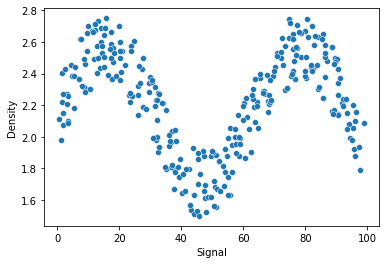

In [8]:
sns.scatterplot(data=df, x='Signal', y='Density')

In [18]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [13]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [20]:
lr_model = LinearRegression()

In [21]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [22]:
lr_preds = lr_model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [25]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.25700519965846297

<AxesSubplot:xlabel='Signal', ylabel='Density'>

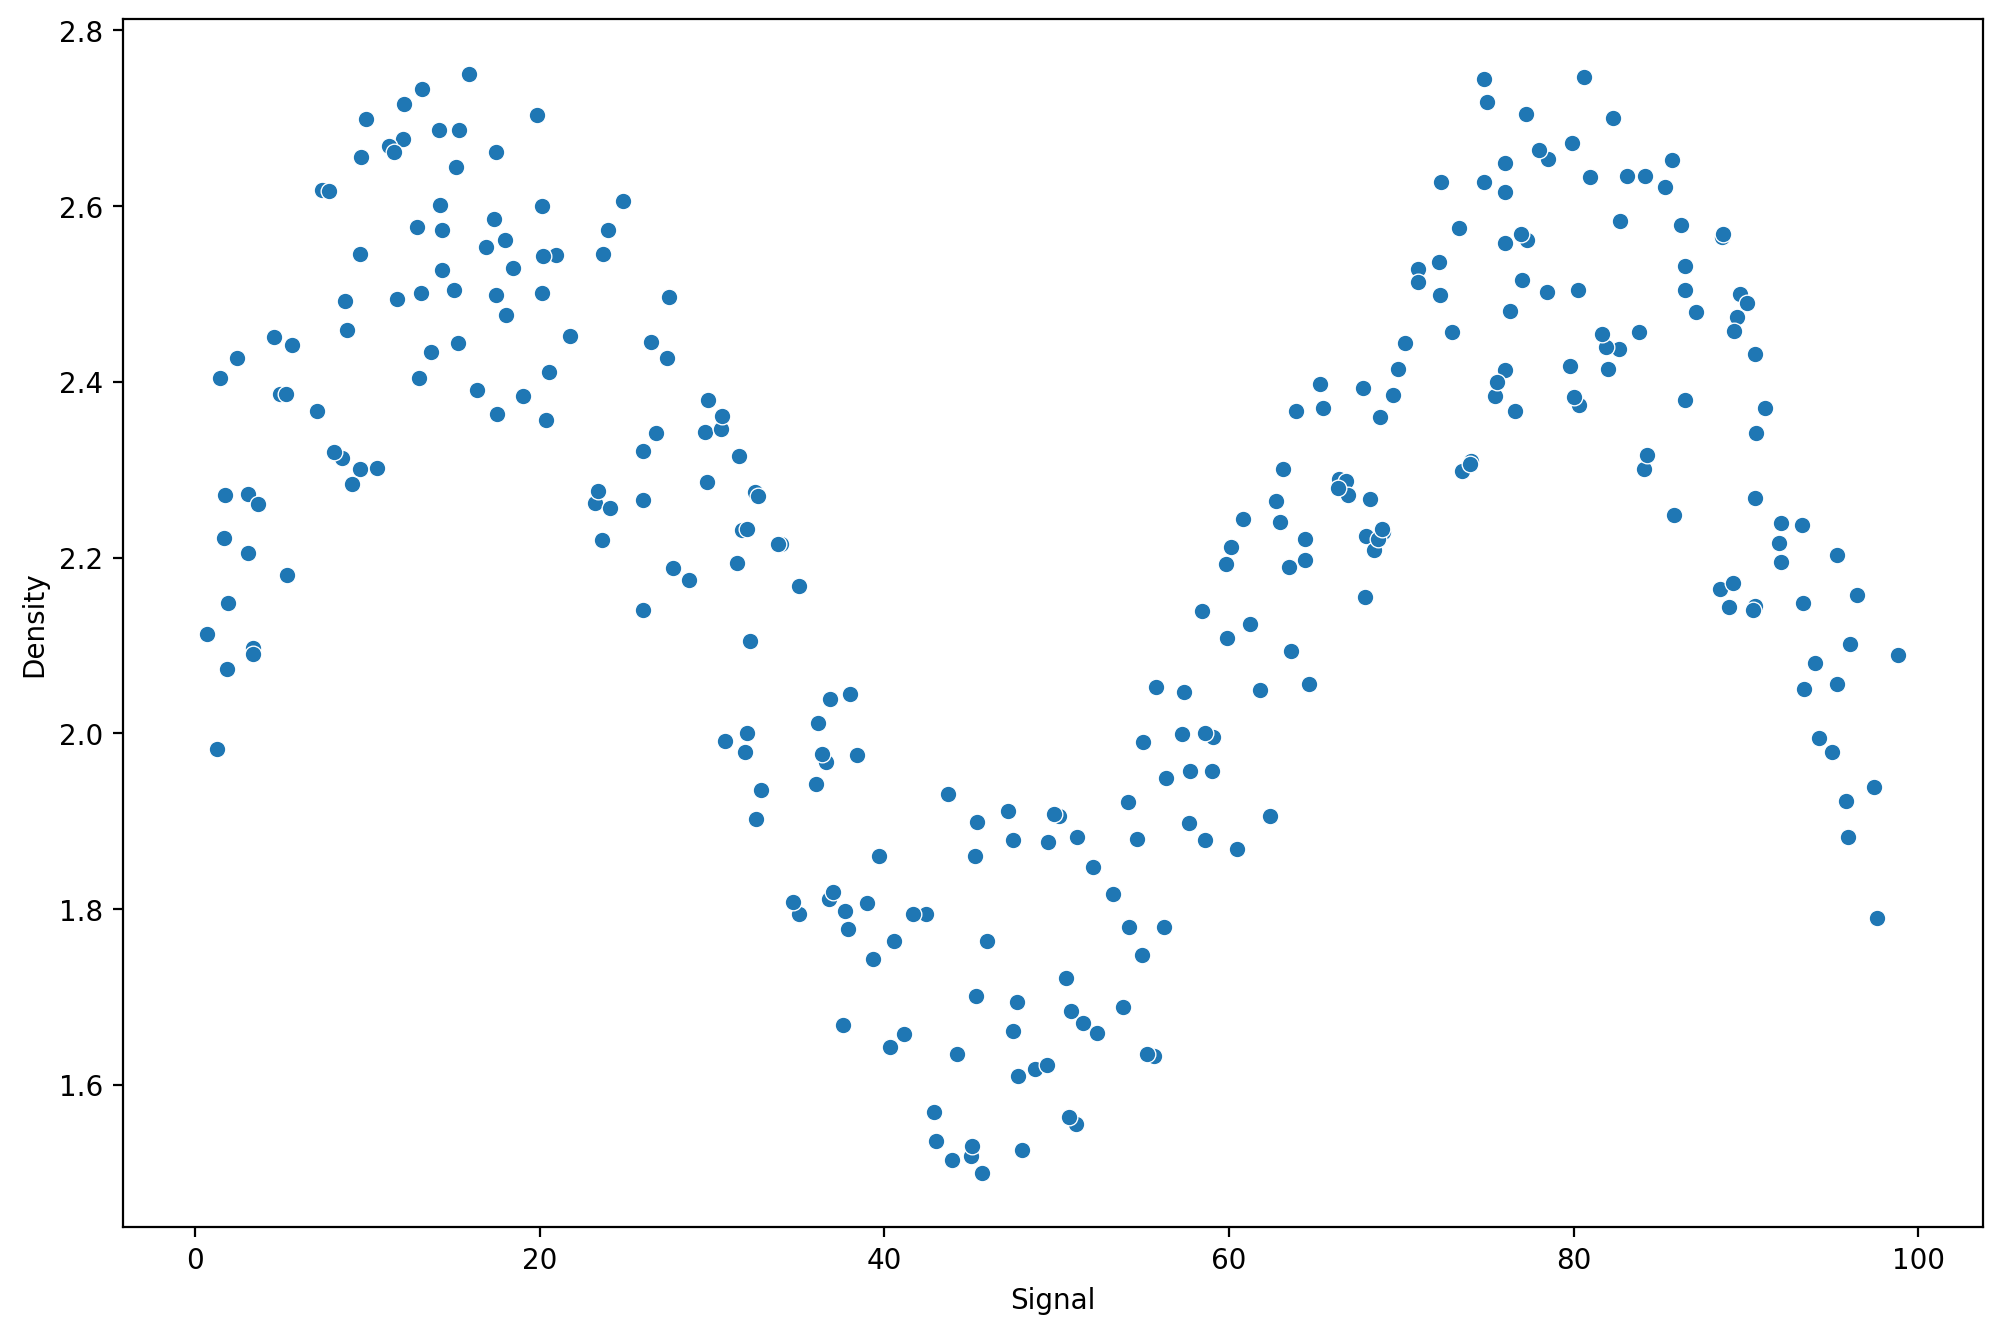

In [26]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='Signal', y='Density')

In [27]:
signal_range = np.arange(0,100)

In [28]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [30]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

In [31]:
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

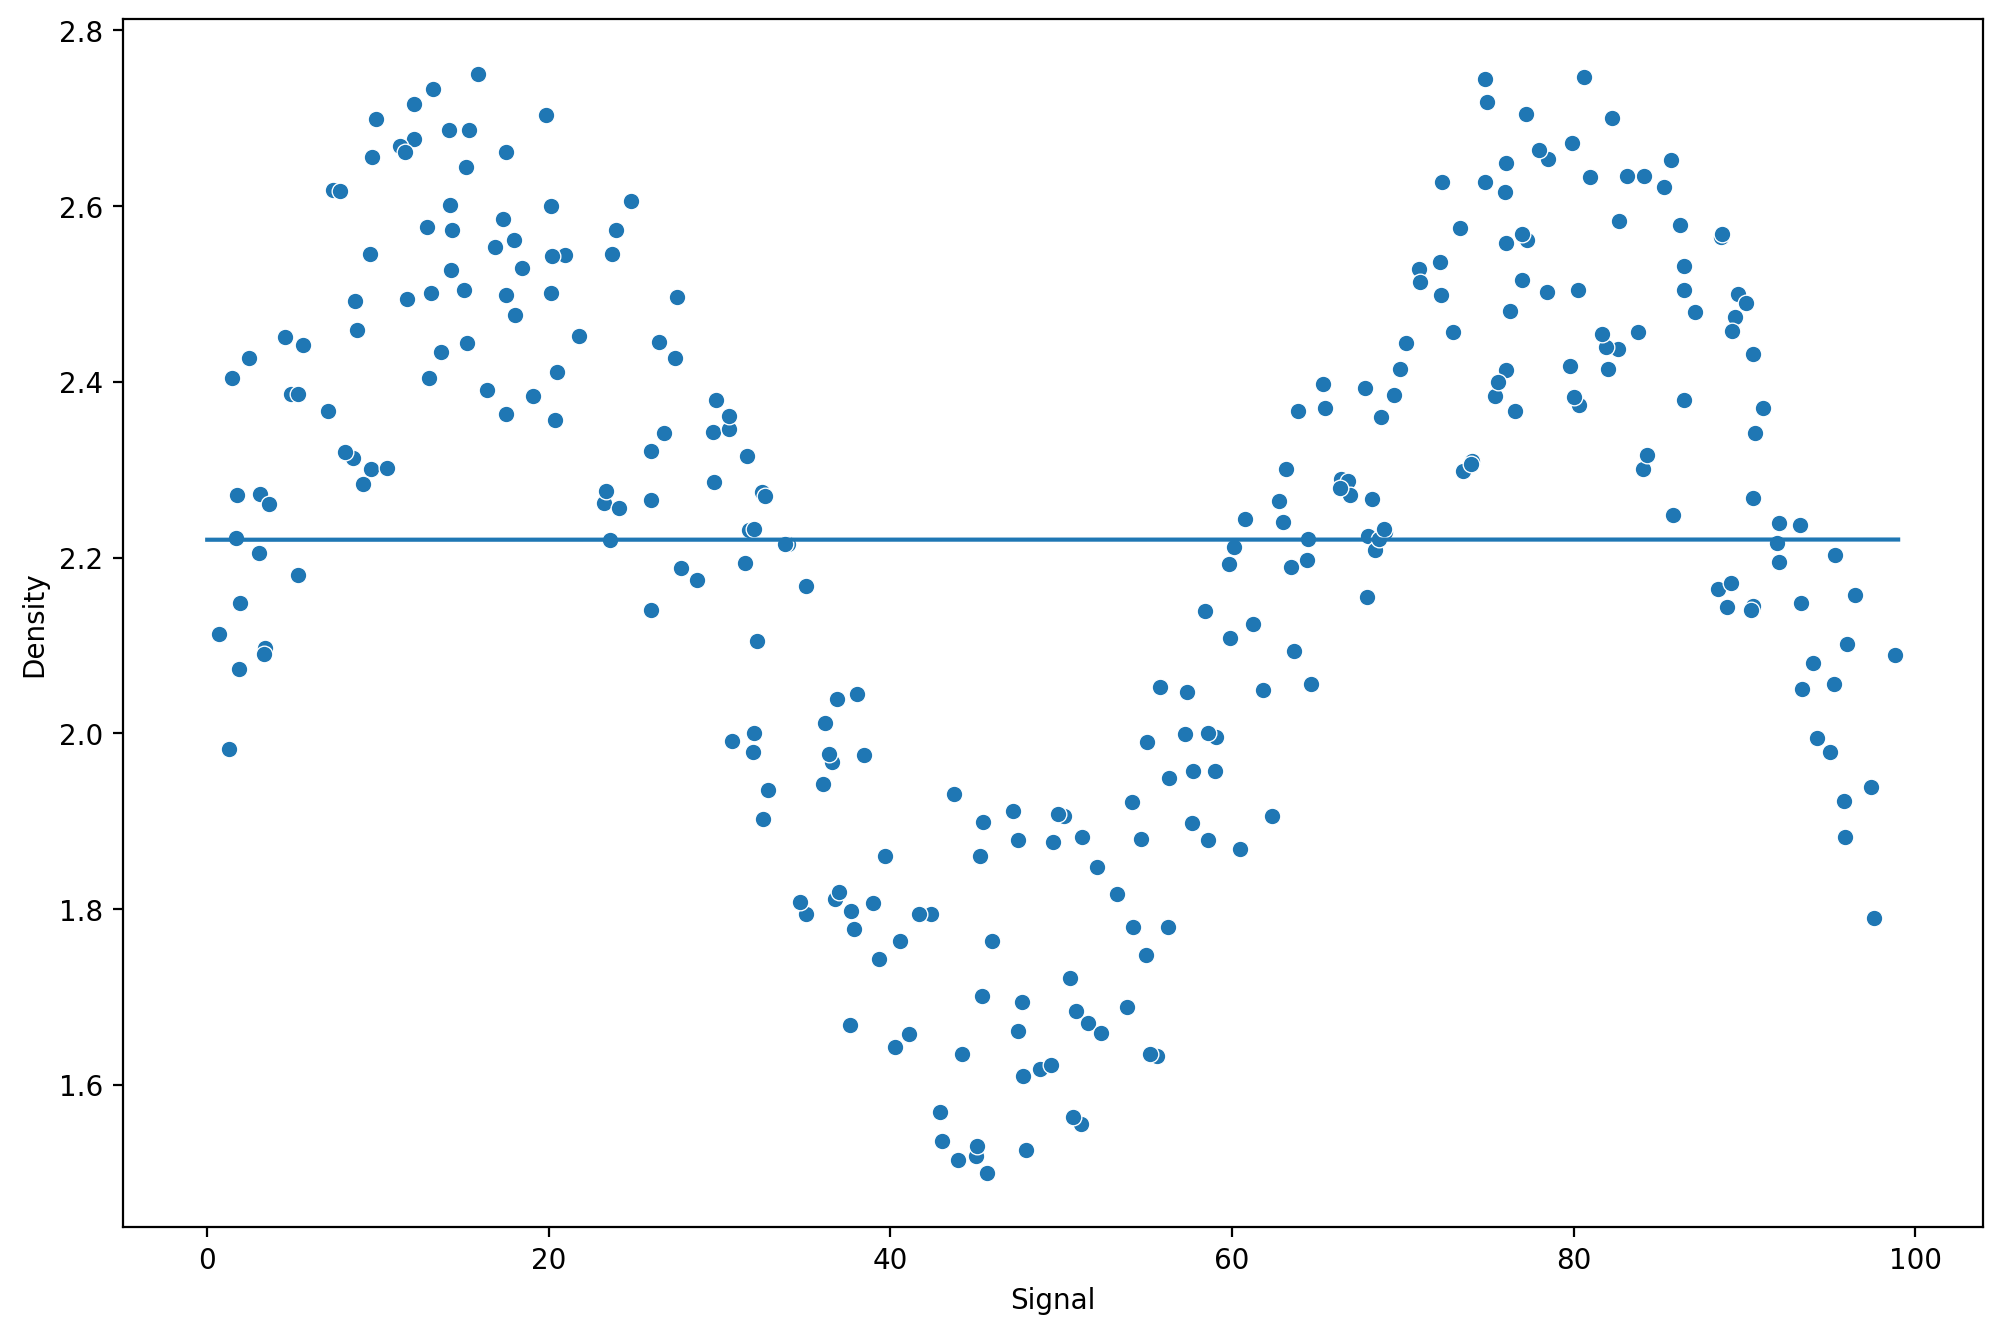

In [32]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='Signal', y='Density')

plt.plot(signal_range, signal_preds)

In [37]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # FIT MODEL TRAINING
    model.fit(X_train, y_train)
    # GET METRICS
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE: {mae}')
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f'RMSE: {rmse}')
    
    # PLOT RESULT MODEL SIGNAL RANGE
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8), dpi=200)
    sns.scatterplot(data=df, x='Signal', y='Density', color='black')

    plt.plot(signal_range, signal_preds)

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [44]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE: 0.11969197789395561
RMSE: 0.13807559069395703


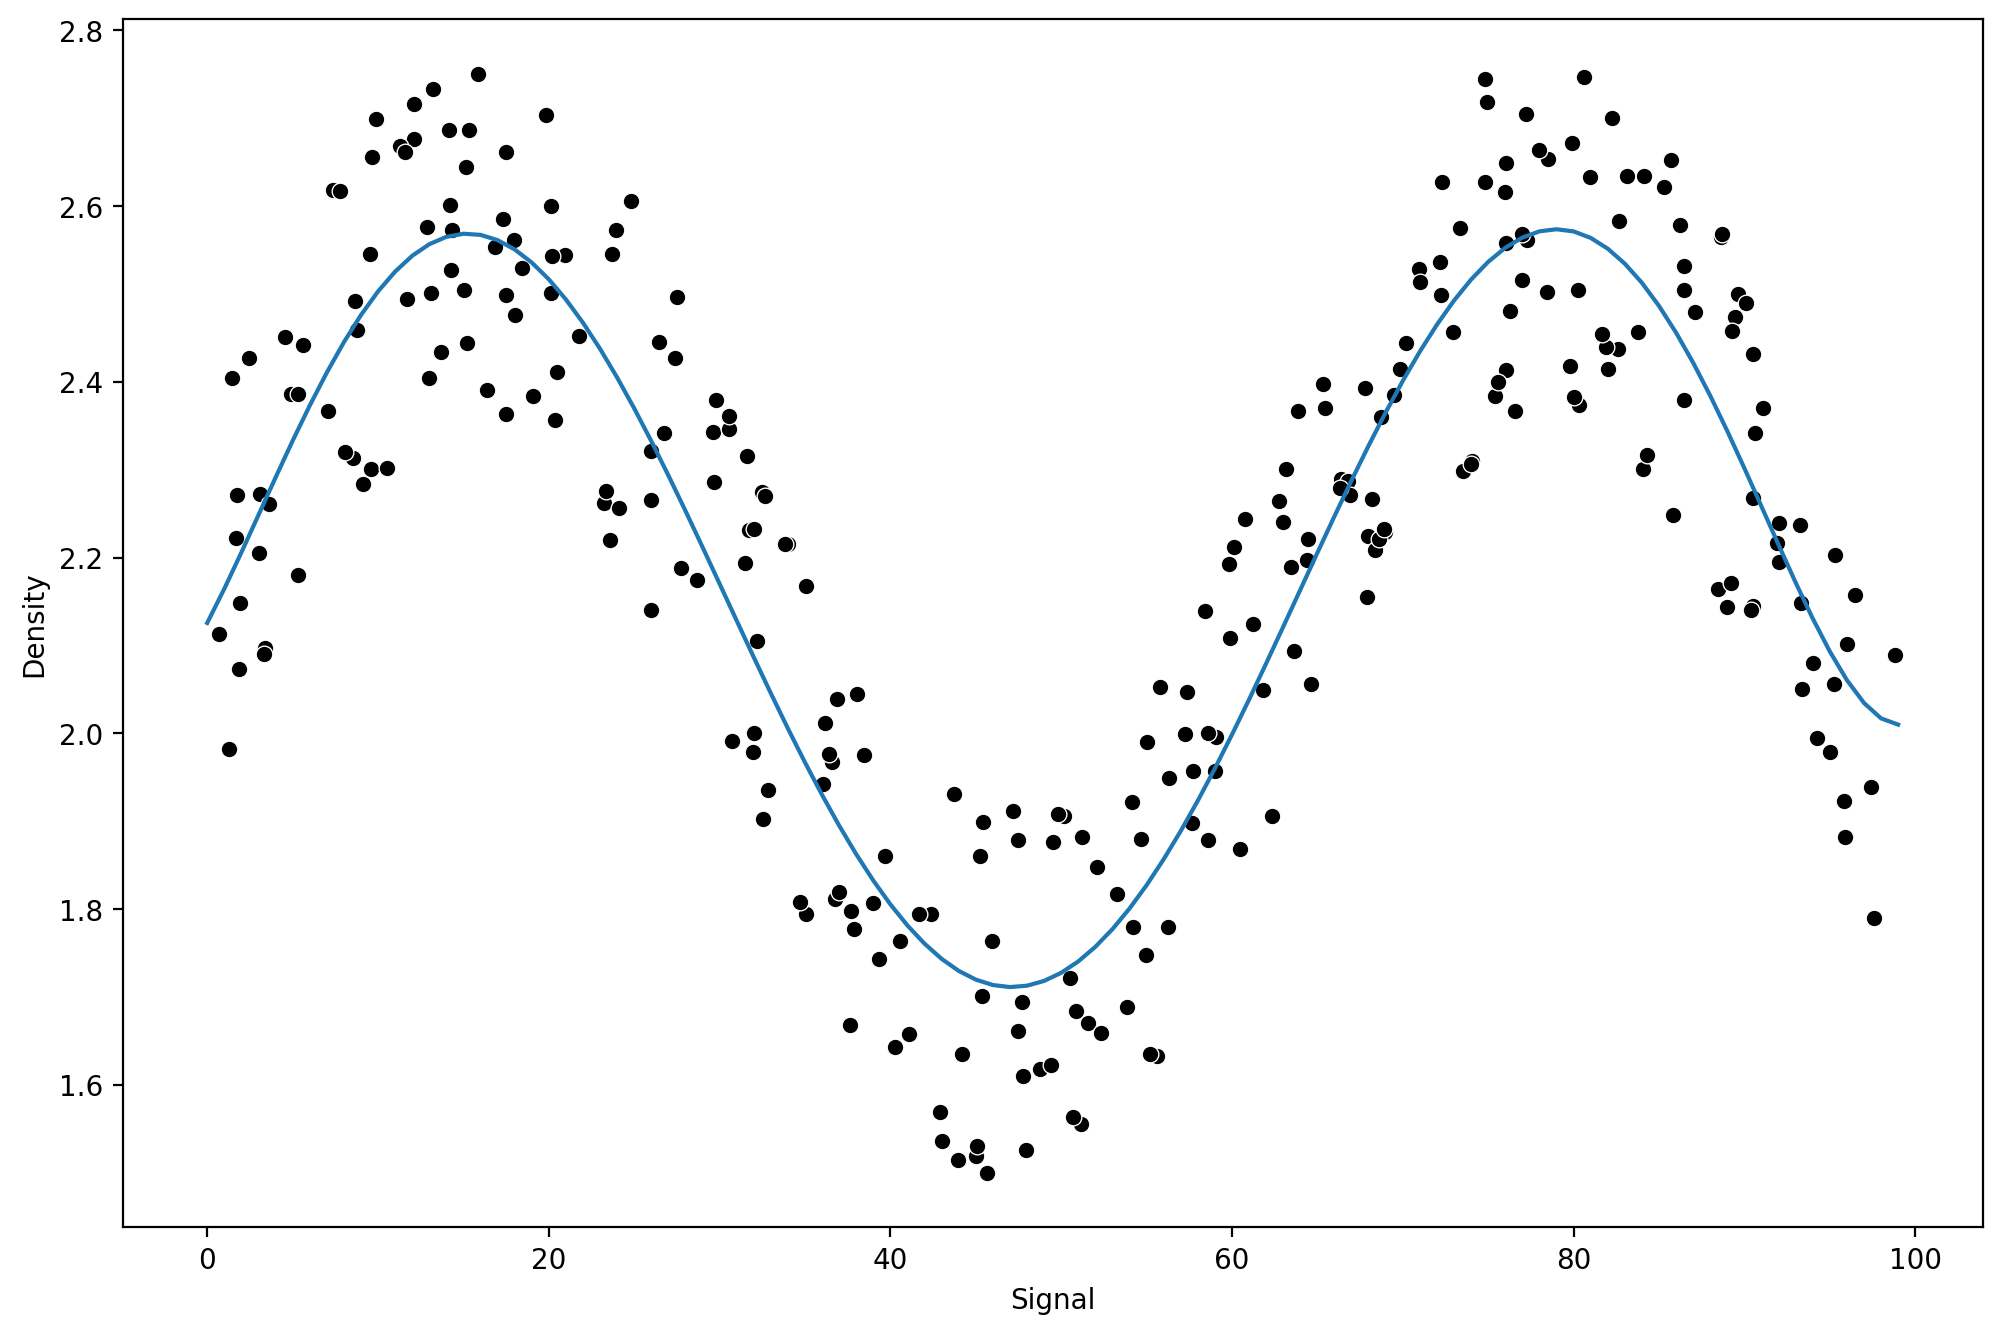

In [45]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [46]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442382
RMSE: 0.15234870286353372
MAE: 0.12198383614100564
RMSE: 0.13730685016923655
MAE: 0.11635971693292672
RMSE: 0.13277855732740926


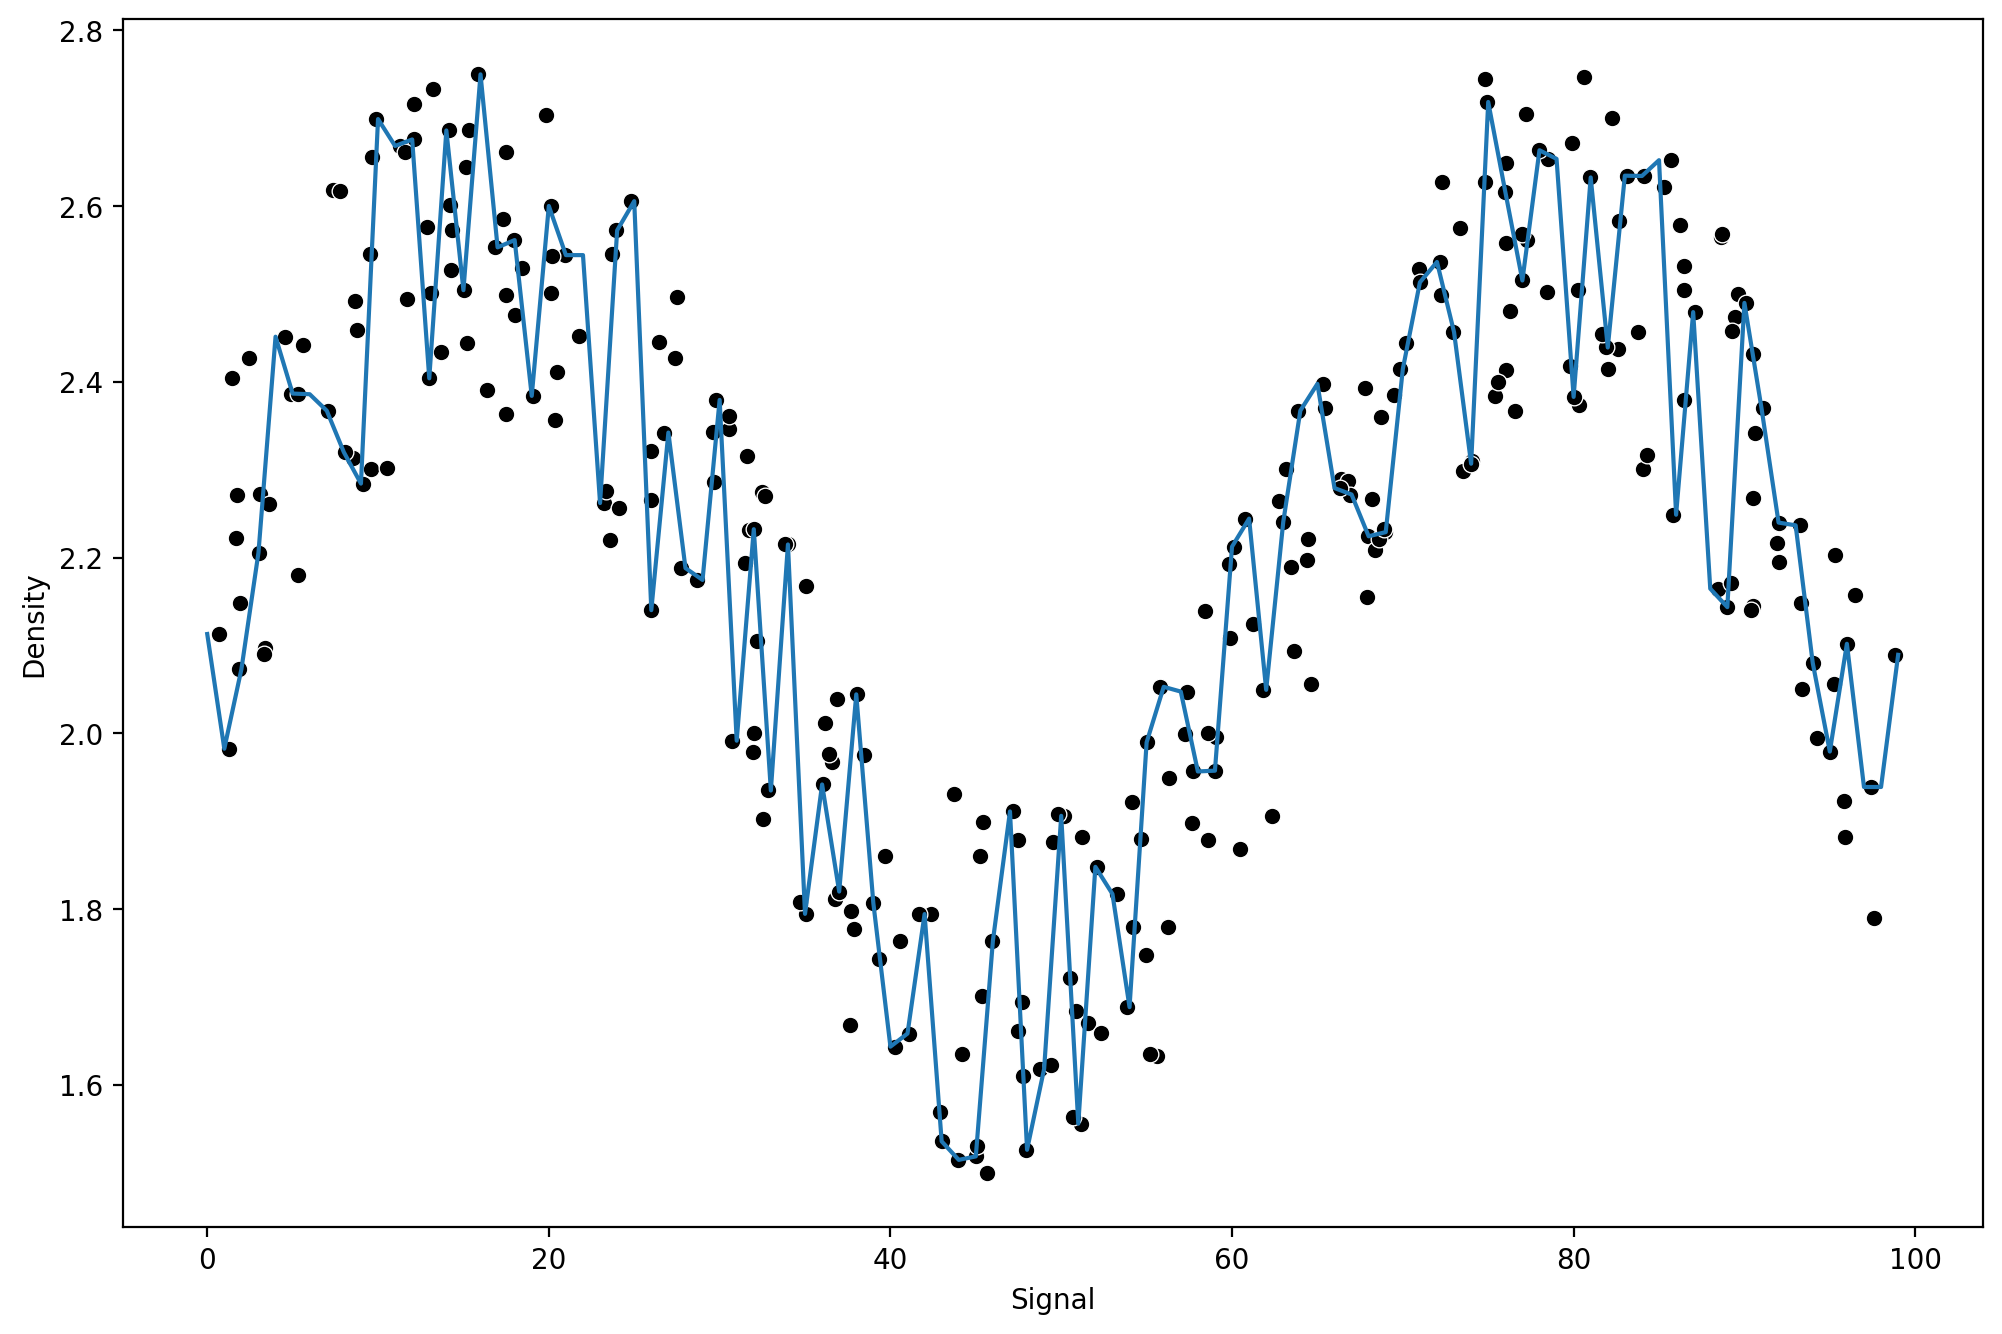

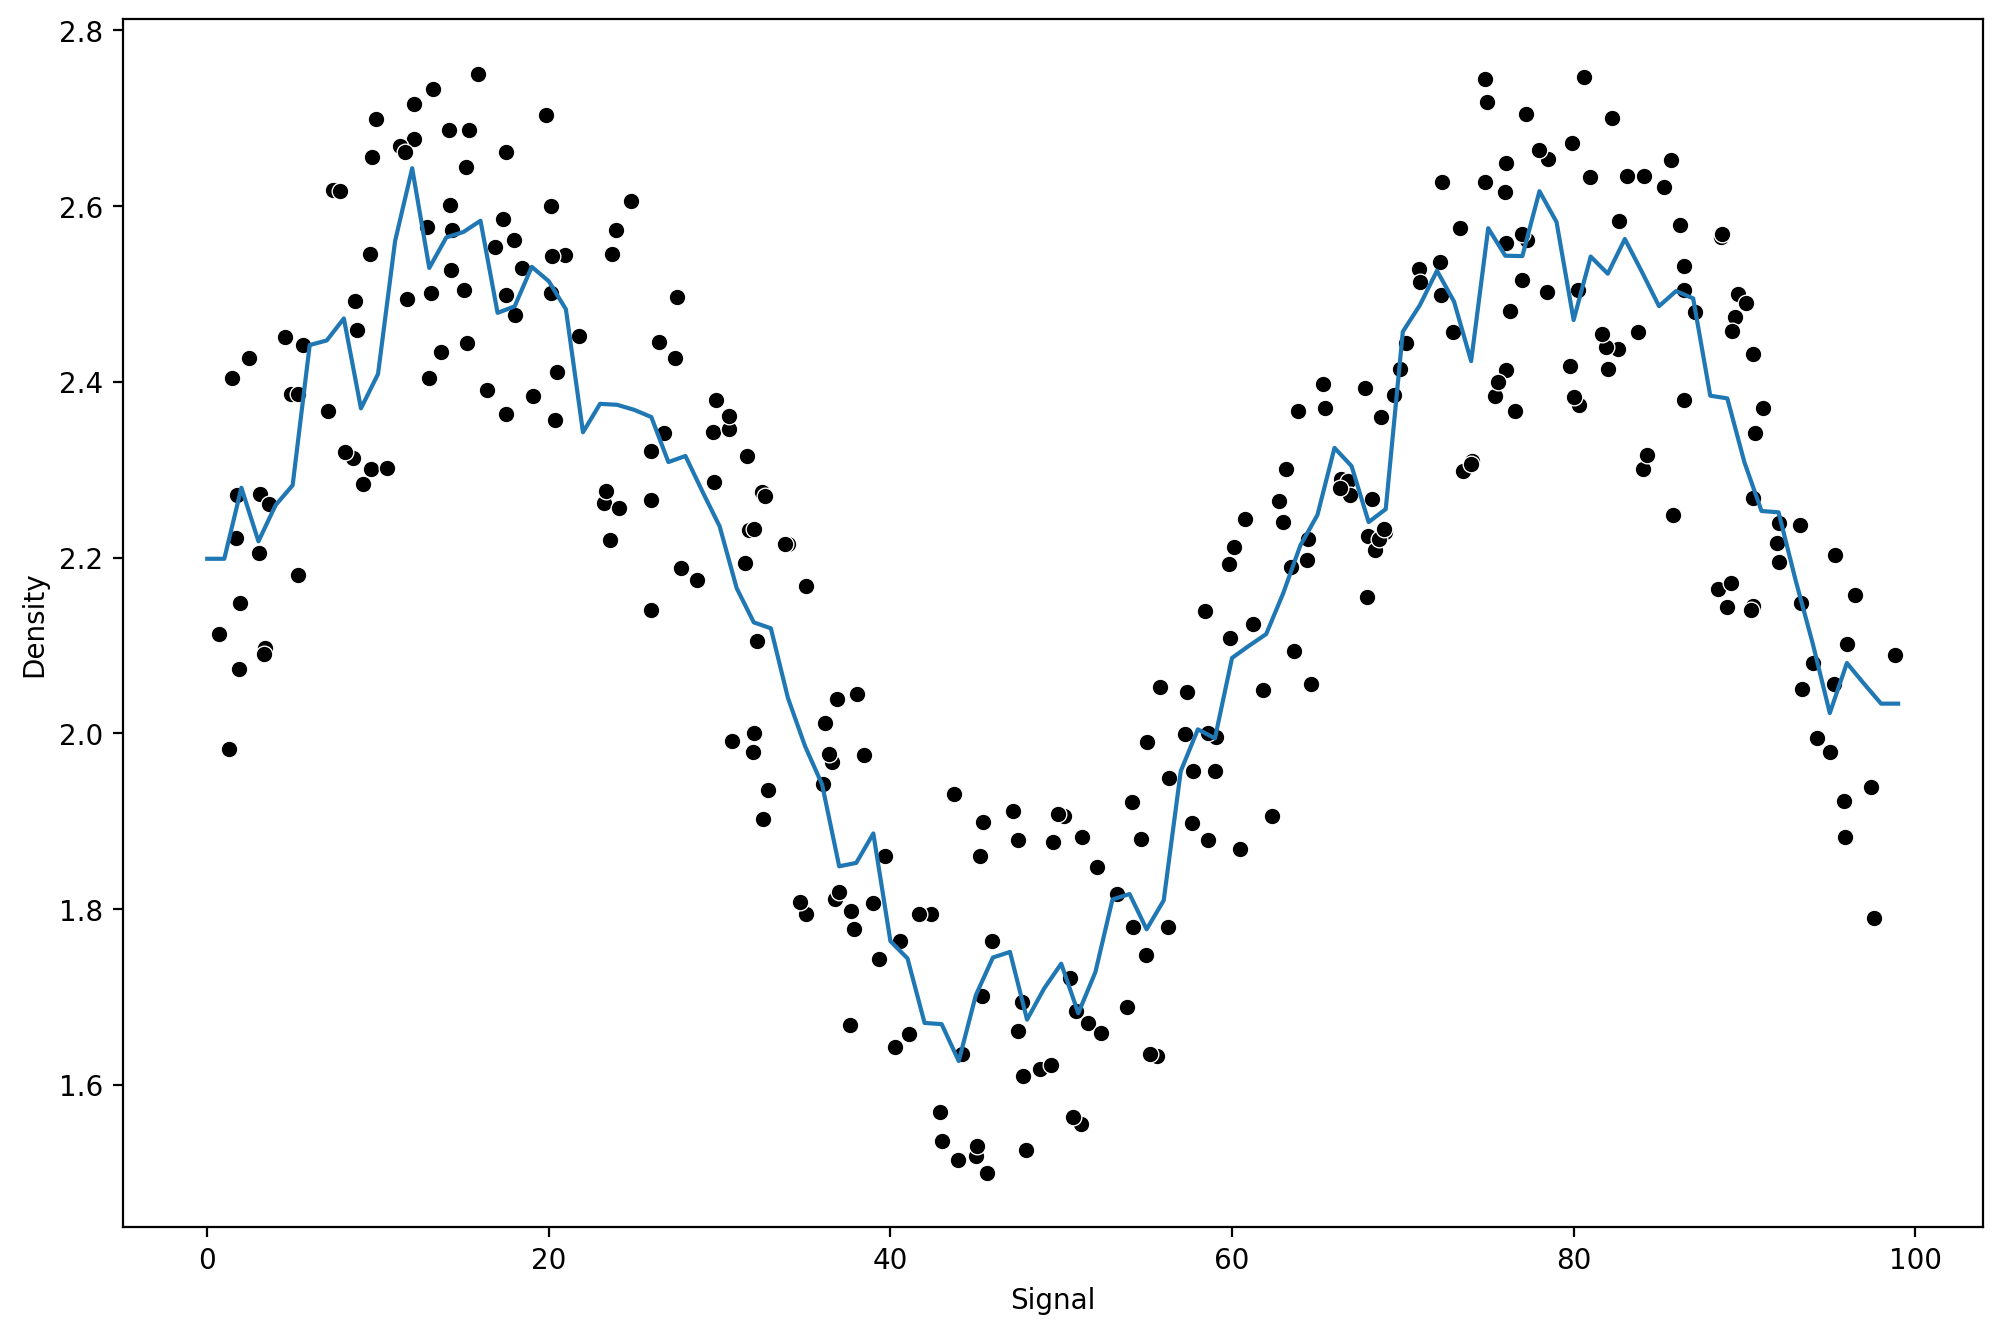

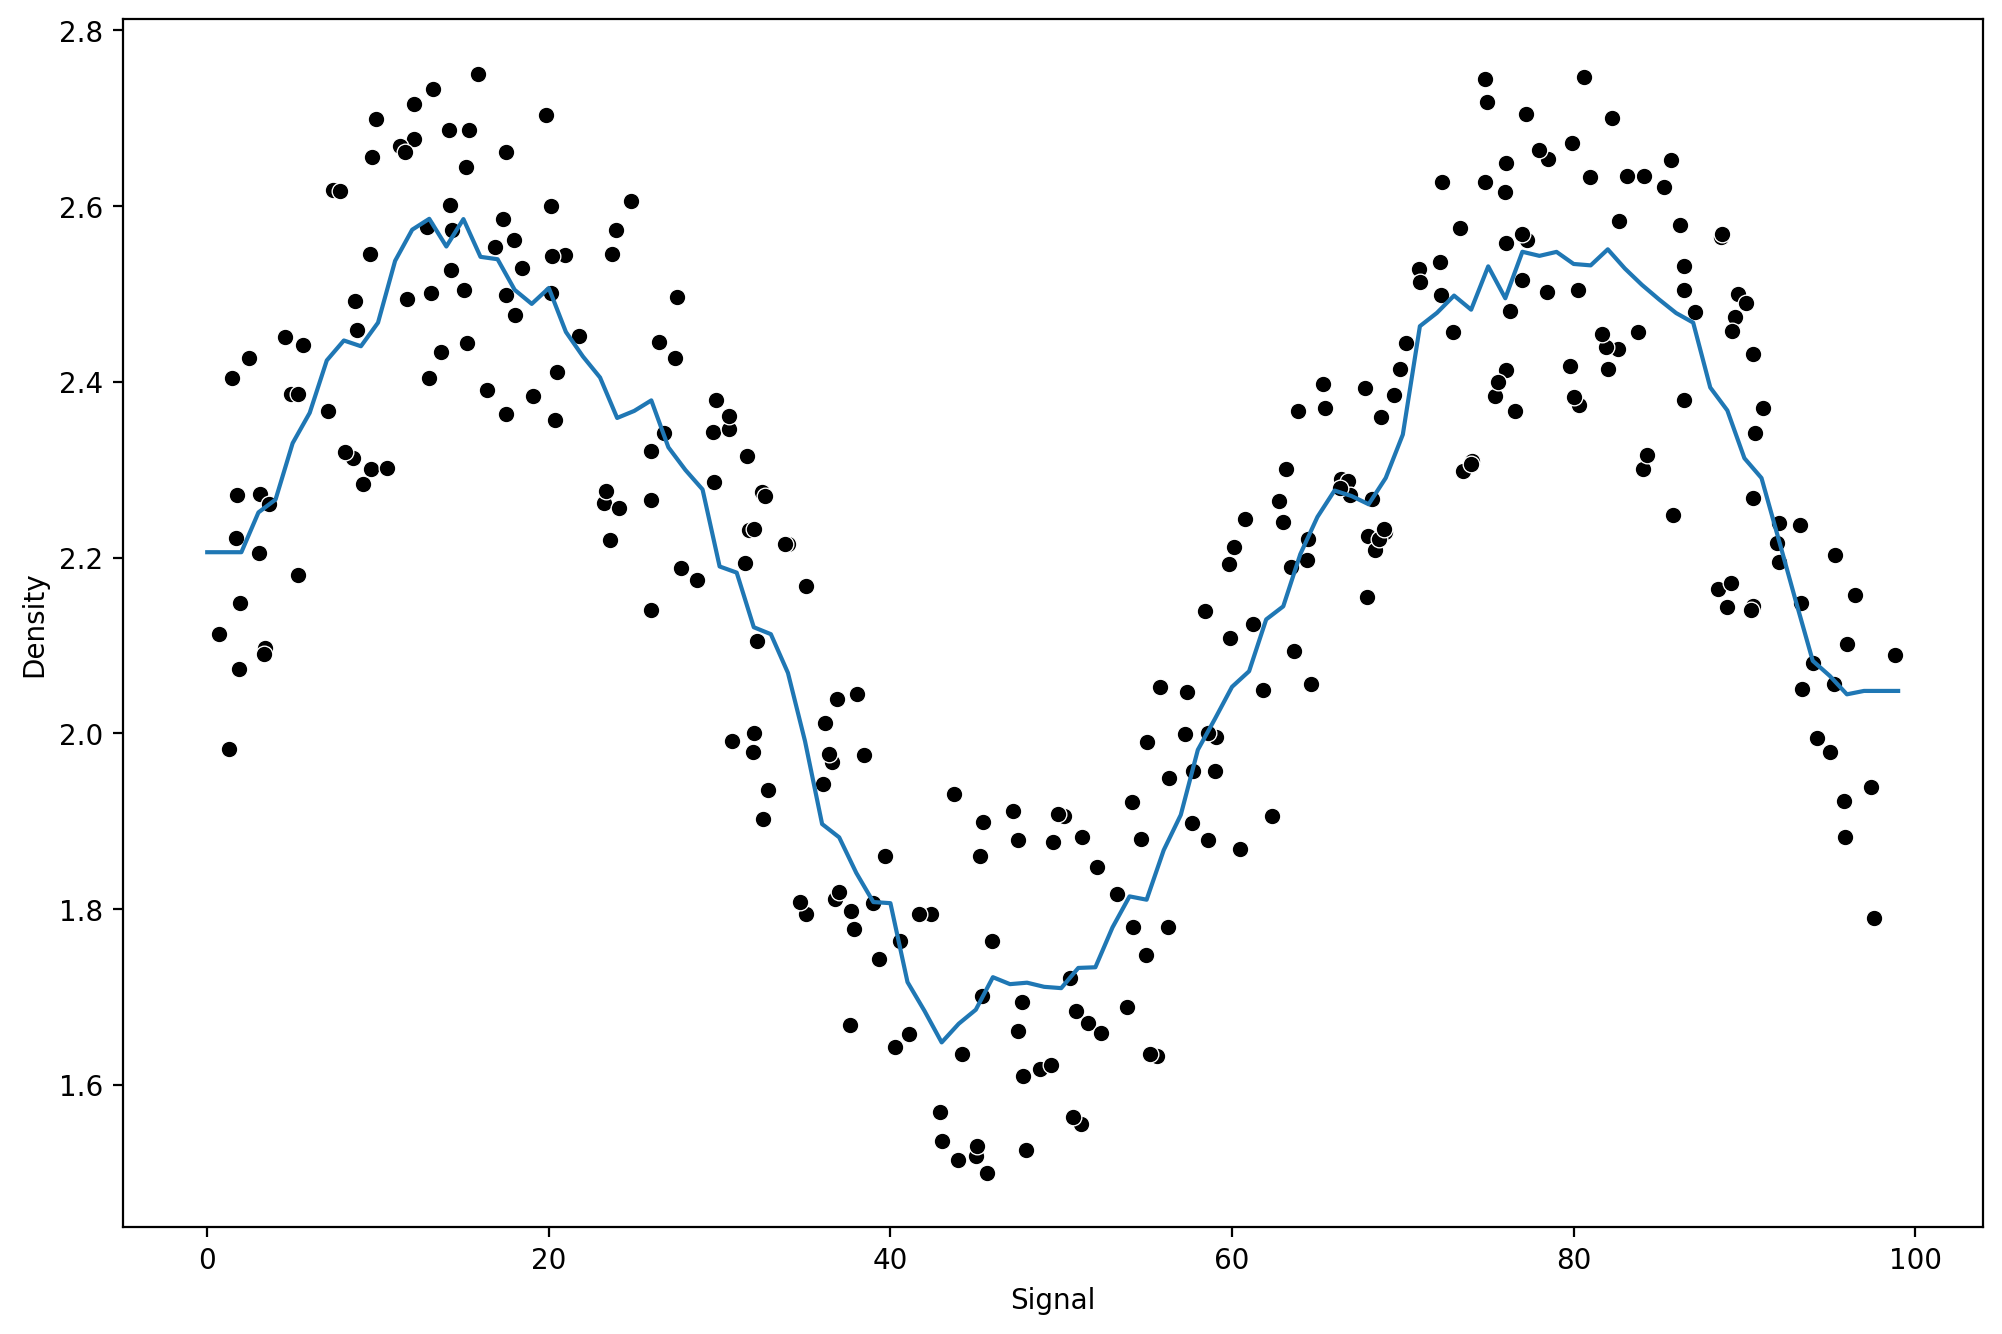

In [47]:
k_values = [1,5,10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

In [48]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442382
RMSE: 0.15234870286353372


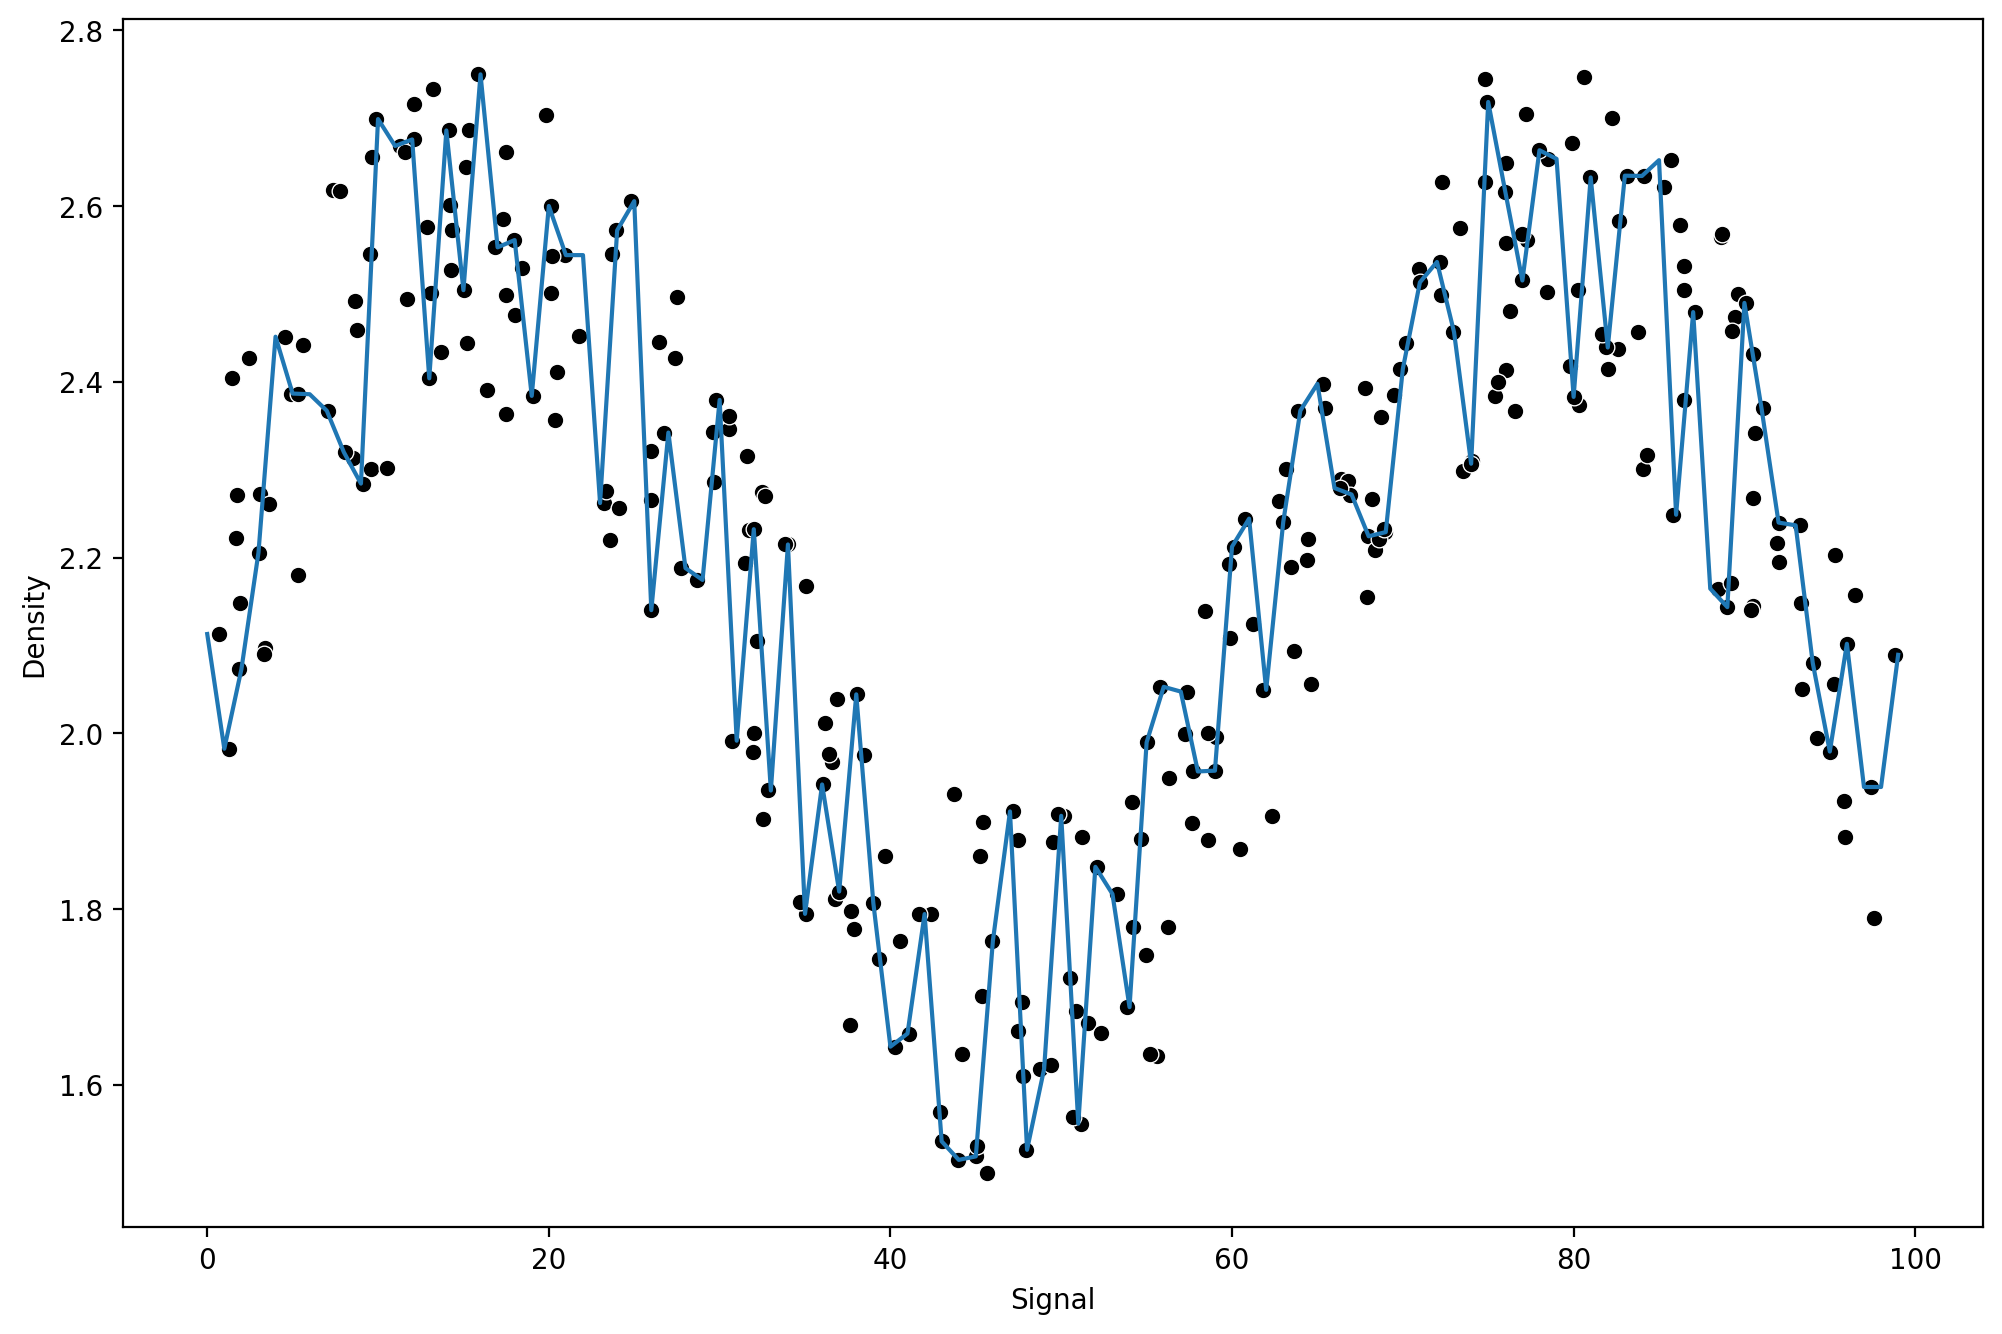

In [49]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [50]:
from sklearn.svm import SVR

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
# We can do GridSearch for everymodel we study.
# But for SVR its "a must" to use GridSearch to find the best param

In [54]:
# make an instance
svr = SVR()
param_grid = {'C':[0.01, 0.1, 1, 5, 10, 100, 1000],
             'gamma':['auto', 'scale']}

grid = GridSearchCV(svr, param_grid)

MAE: 0.10839253242165772
RMSE: 0.12634668775105407


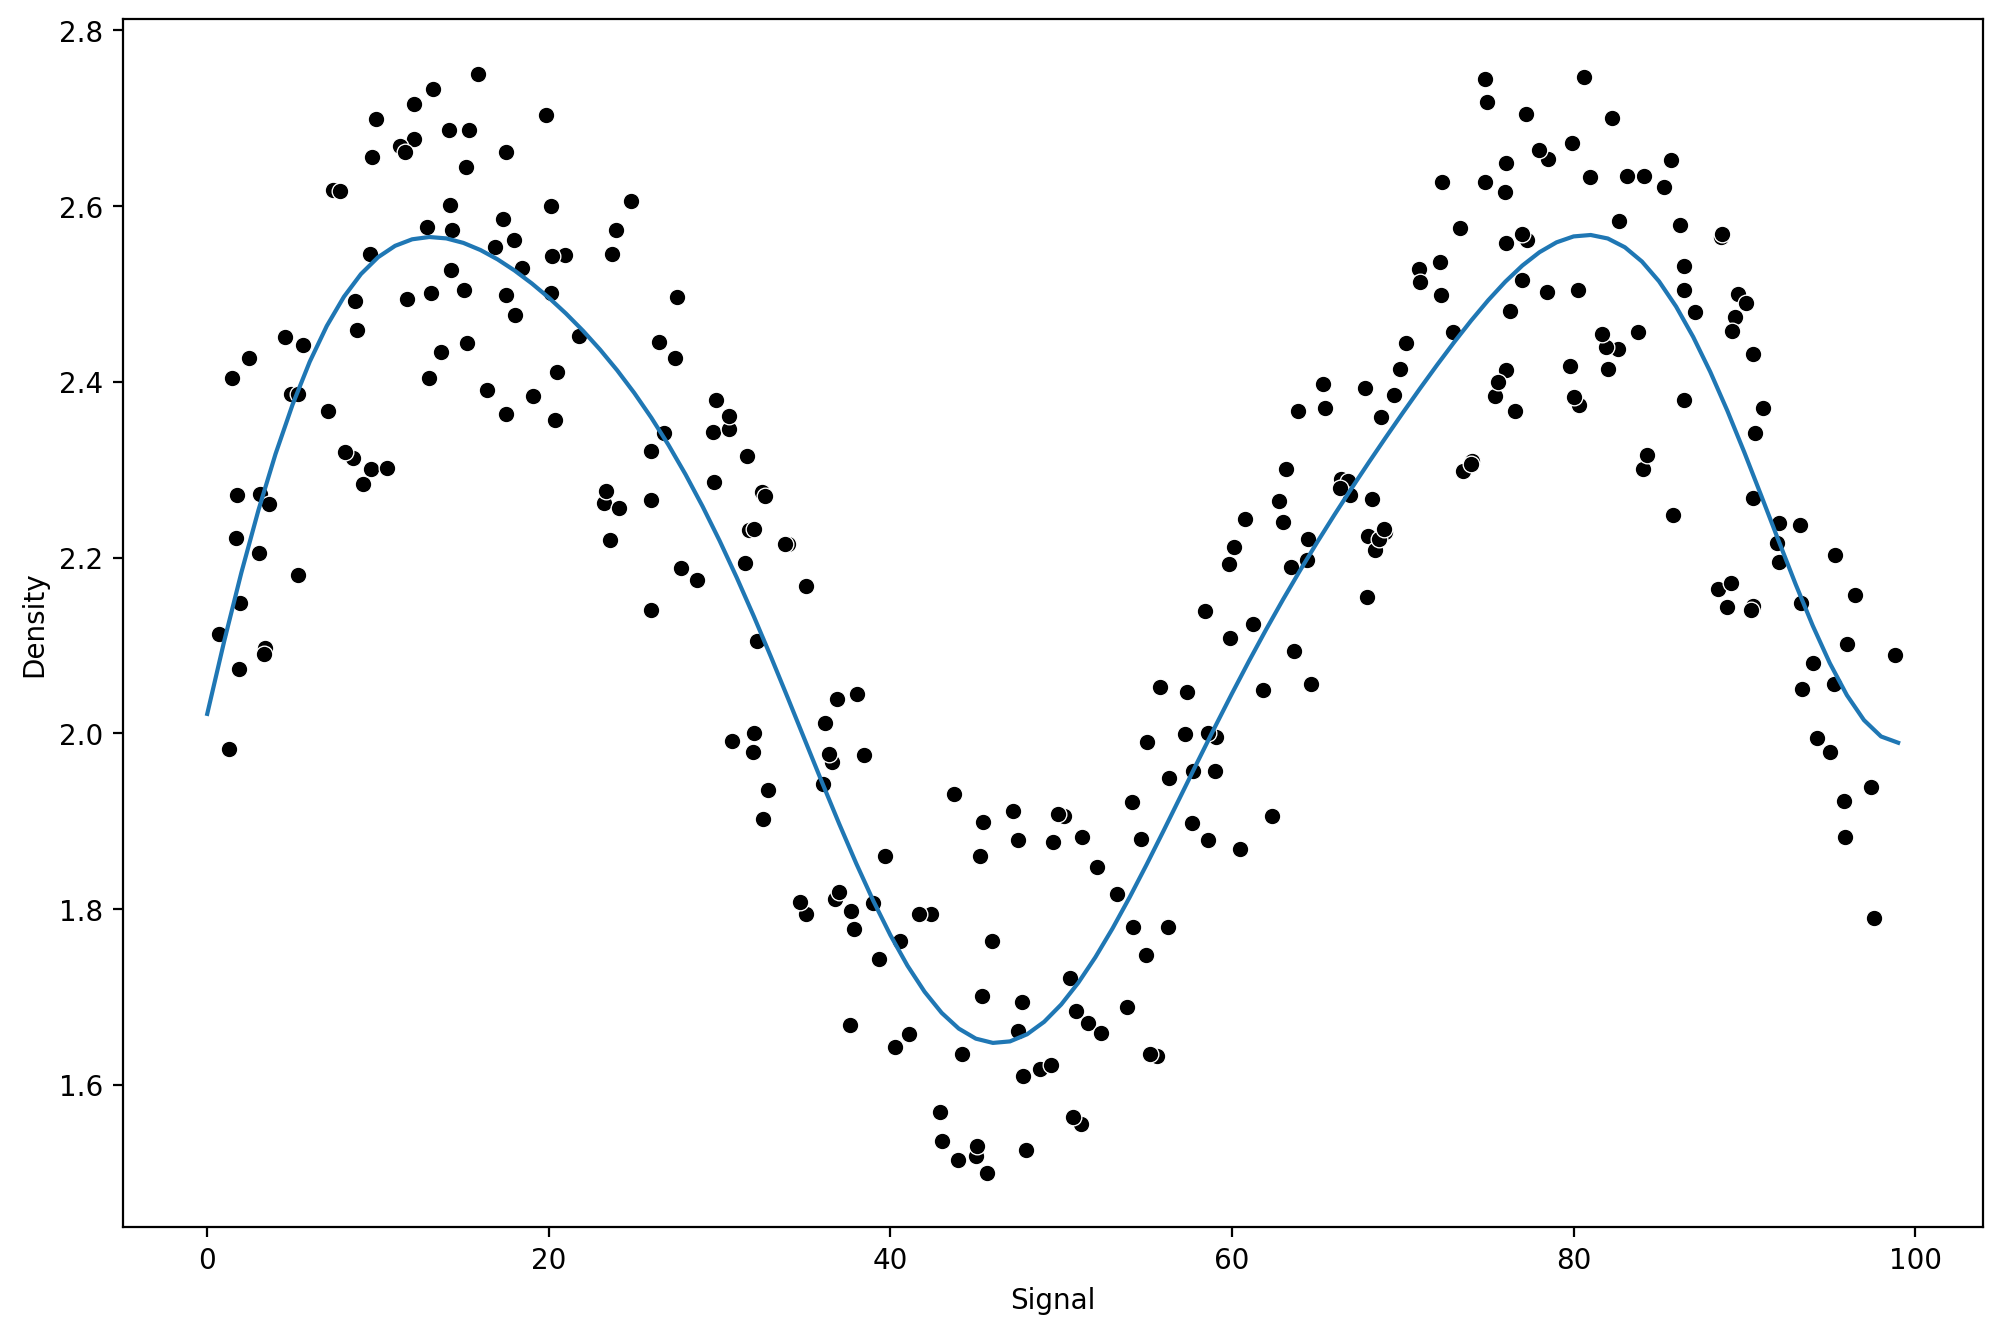

In [55]:
run_model(grid, X_train, y_train, X_test, y_test)

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rfr = RandomForestRegressor(n_estimators=10)

MAE: 0.10812260687070649
RMSE: 0.12893880987775036


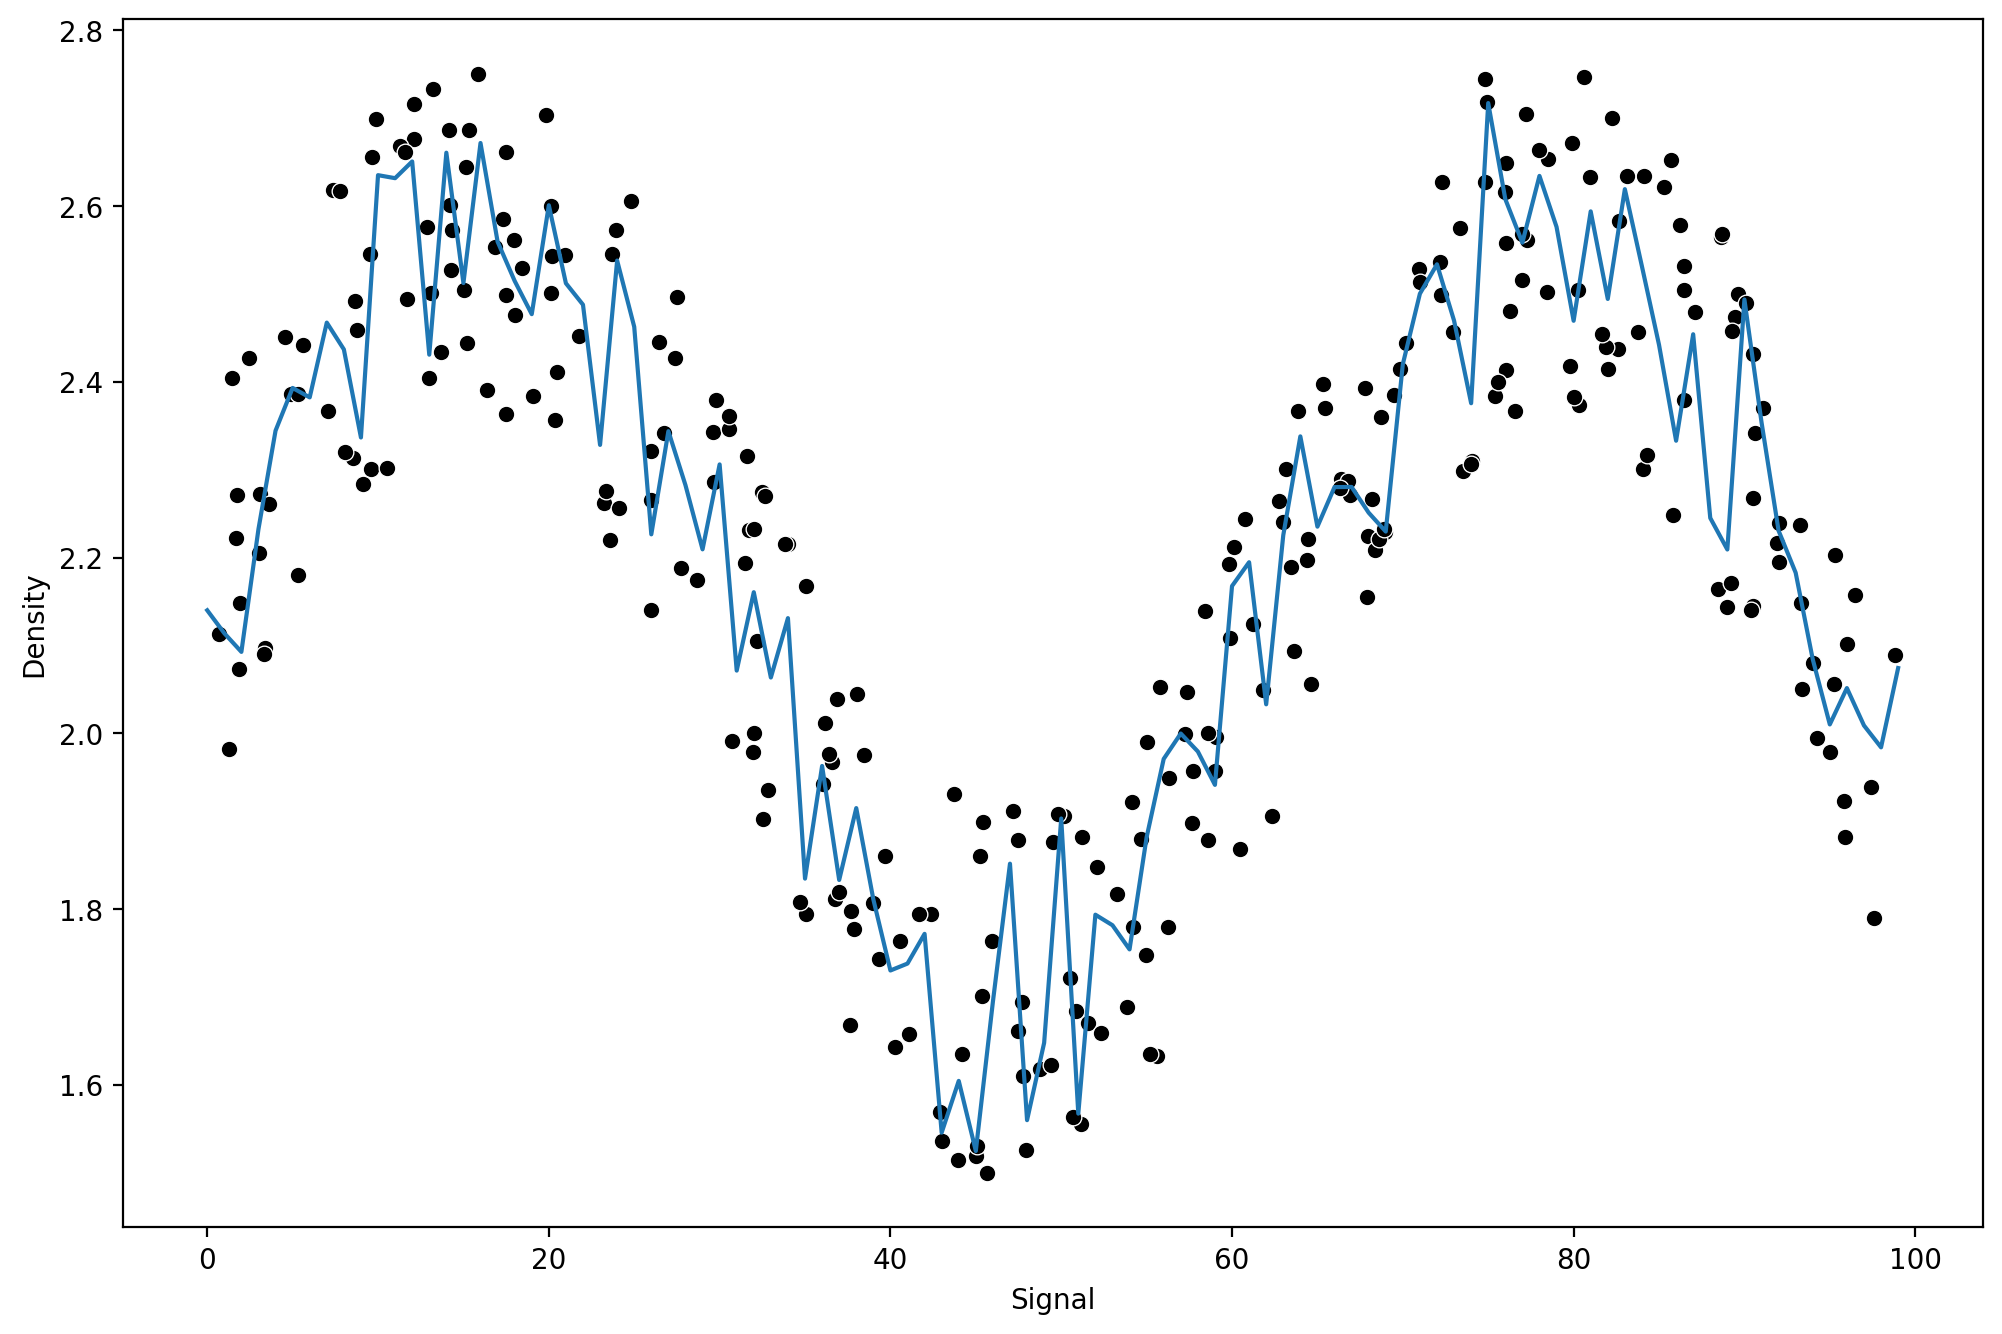

In [59]:
run_model(rfr, X_train, y_train, X_test, y_test)

In [61]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


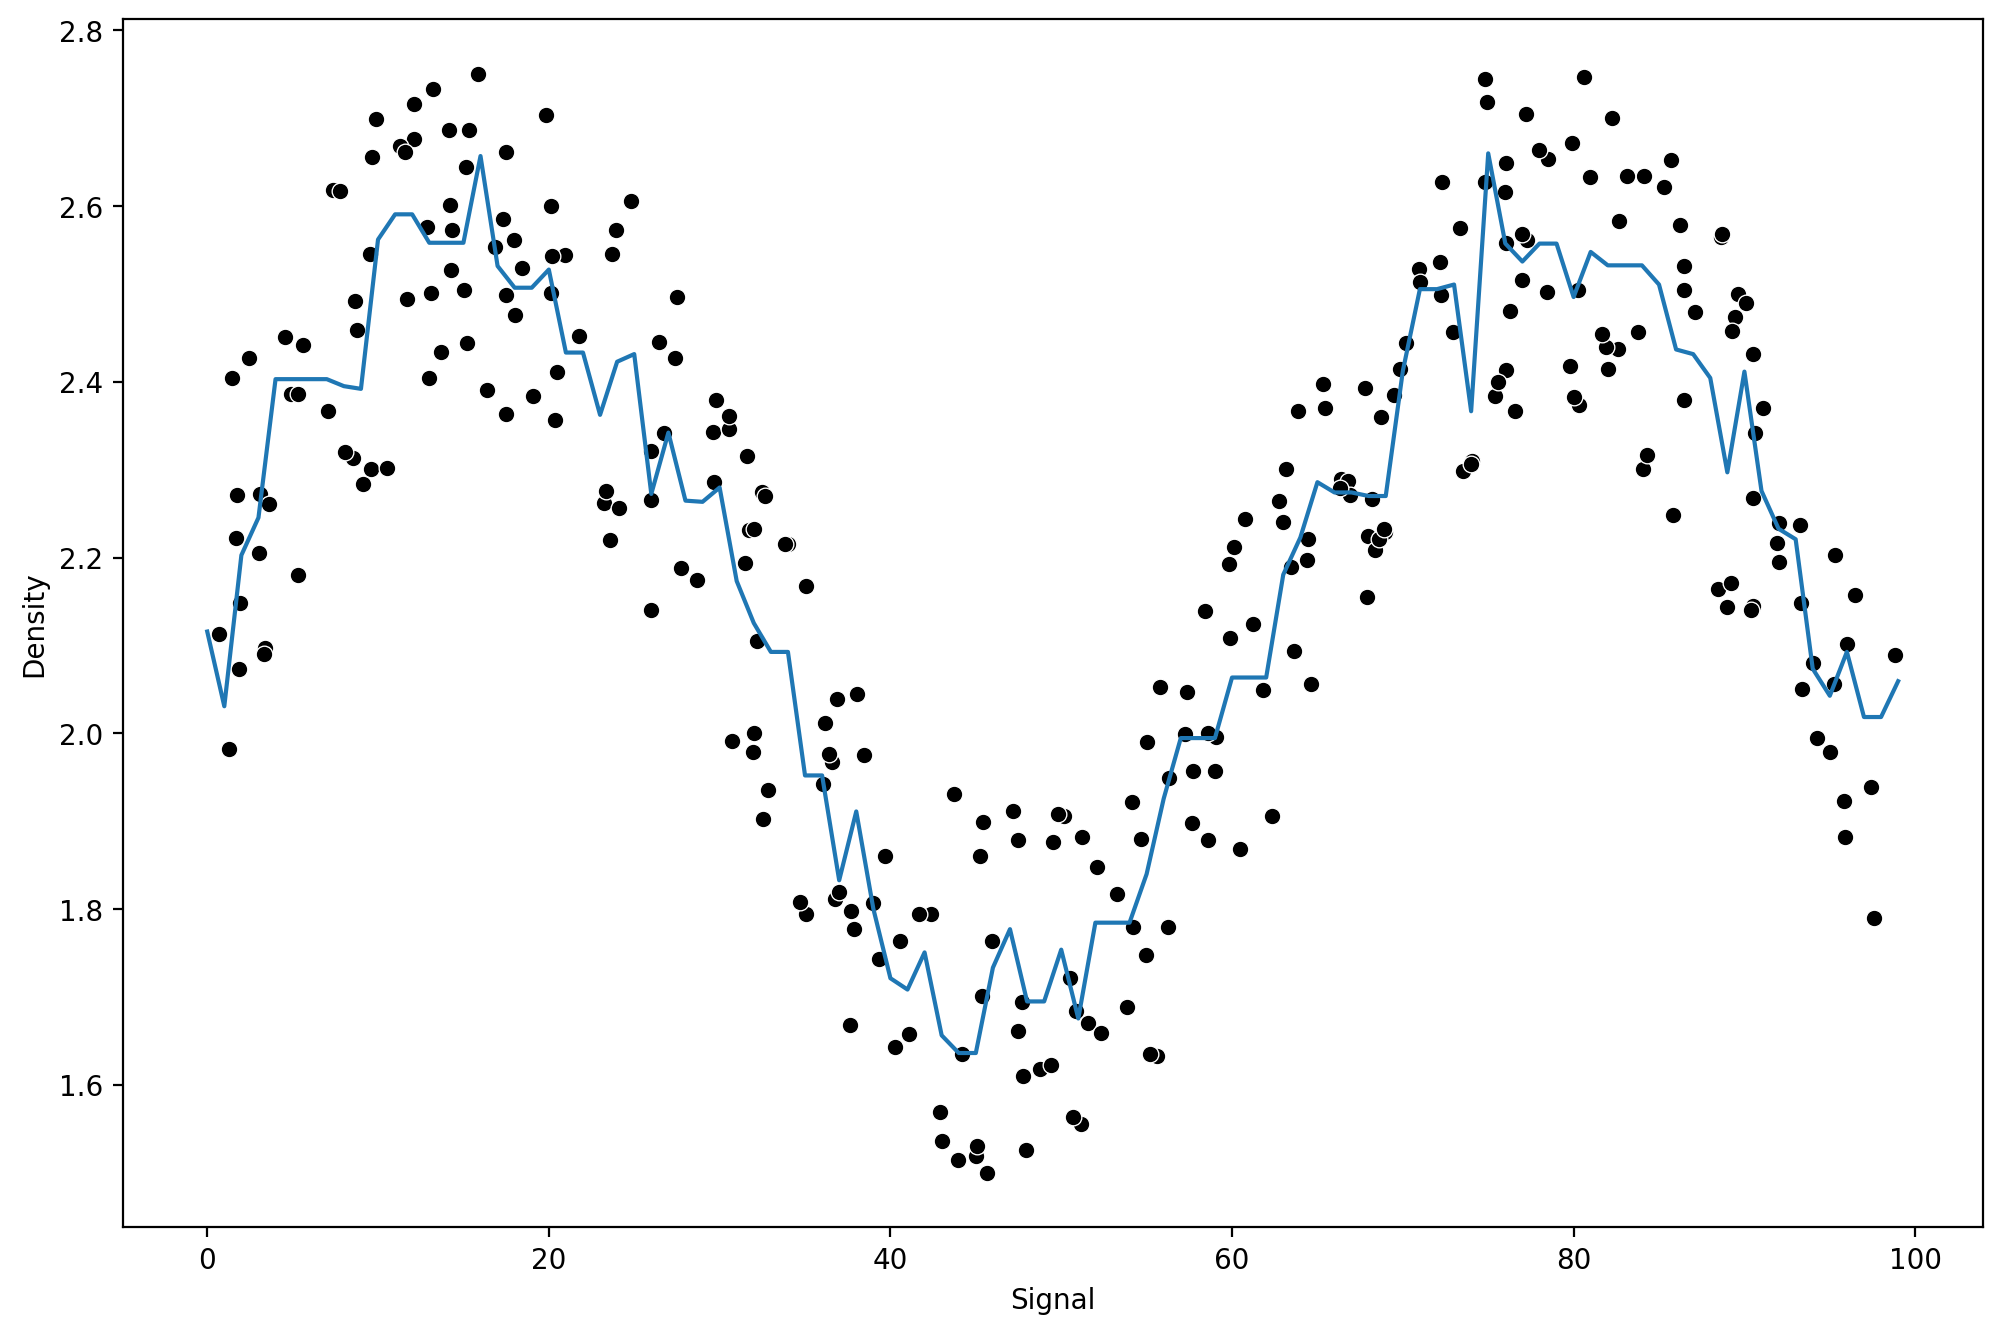

In [62]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.11261608828966181
RMSE: 0.13175736418561332


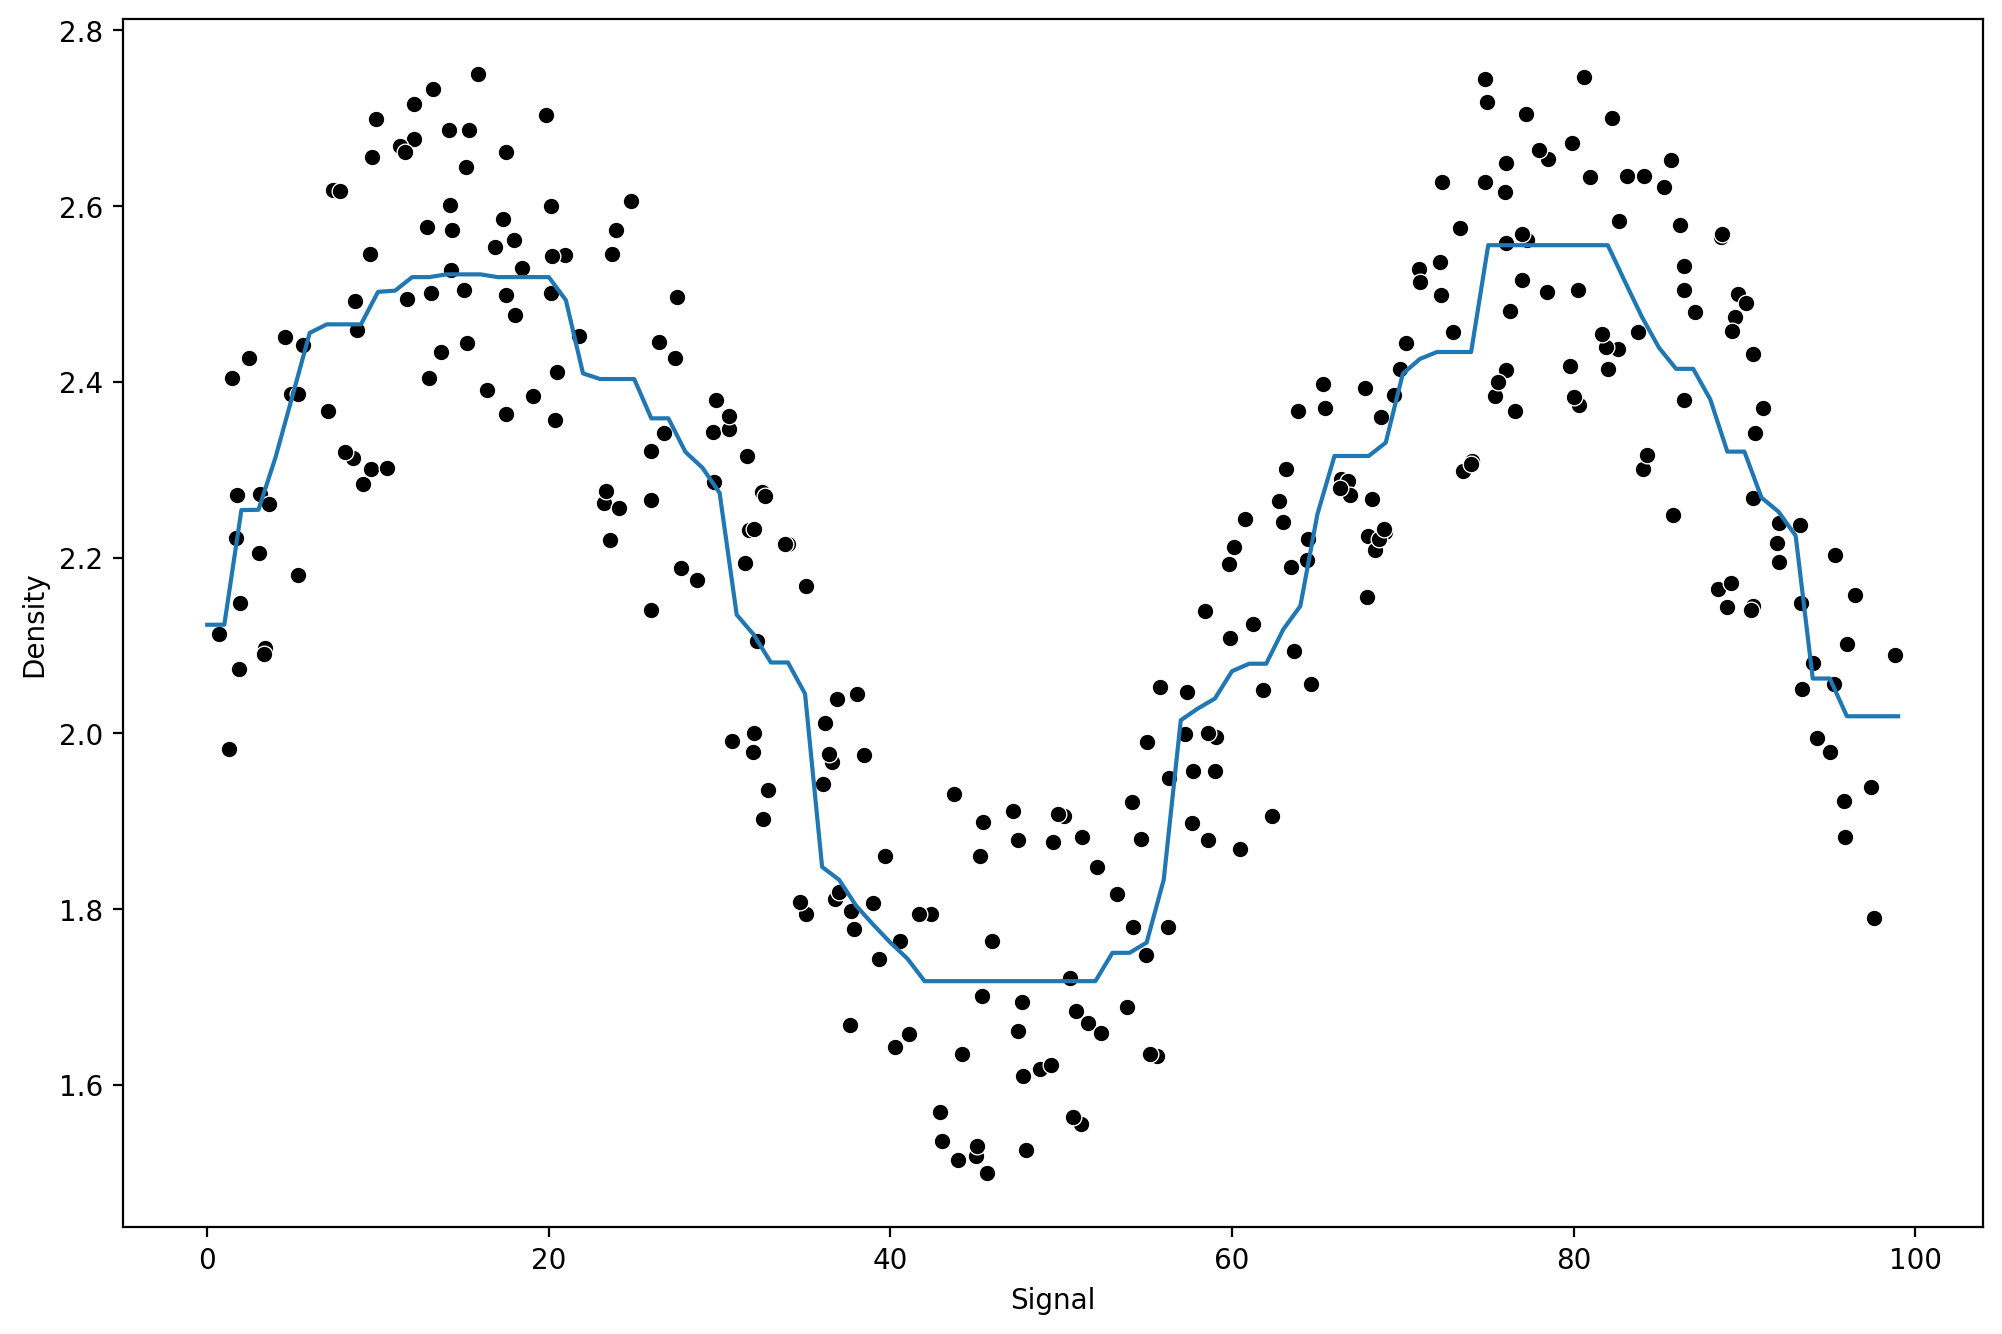

In [63]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)